# LINEAR REGRESSION

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [49]:
df = pd.read_csv('NewspaperData.csv')
df

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


In [50]:
df.shape

(34, 3)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 944.0+ bytes


In [52]:
df.describe()

,daily,sunday
count,34.000000,34.000000
mean,430.962471,591.202412
std,269.211470,376.418051
min,133.239000,202.614000
25%,233.021500,327.769500
50%,355.235500,436.712500
75%,516.616500,699.735250
max,1209.225000,1762.015000


In [53]:
df.isnull().sum()

Newspaper    0
daily        0
sunday       0
dtype: int64

In [54]:
df = df.drop('Newspaper', axis=1)
df

,daily,sunday
0,391.952,488.506
1,516.981,798.298
2,355.628,235.084
3,238.555,299.451
4,537.780,559.093
5,733.775,1133.249
6,198.832,348.744
7,252.624,417.779
8,206.204,344.522
9,231.177,323.084


<Axes: >

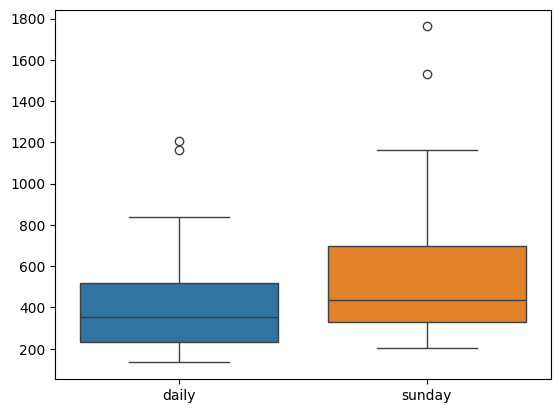

In [55]:
import seaborn as sns
sns.boxplot(df)

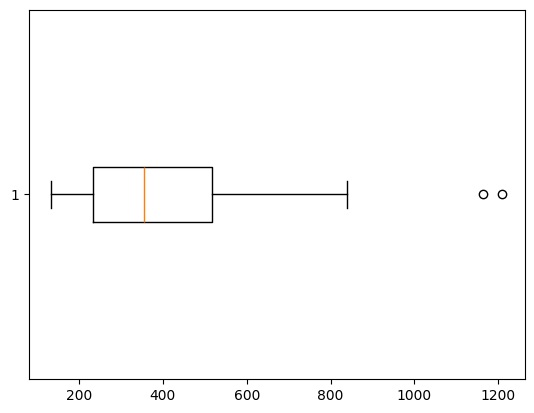

In [56]:
plt.boxplot(df['daily'],vert = False)
plt.show()

<Axes: xlabel='daily', ylabel='Density'>

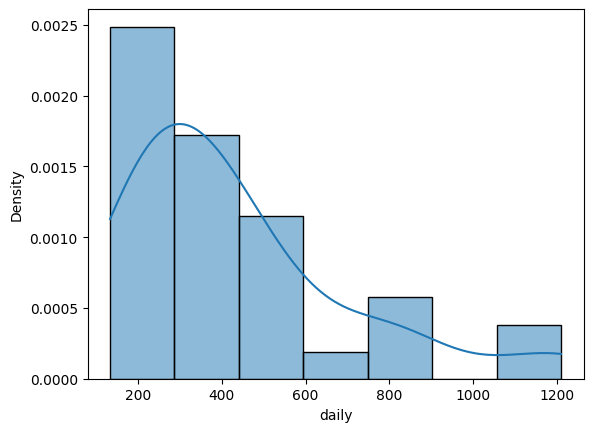

In [57]:
sns.histplot(df['daily'],kde = True,stat = 'density' )

<Axes: xlabel='sunday', ylabel='Density'>

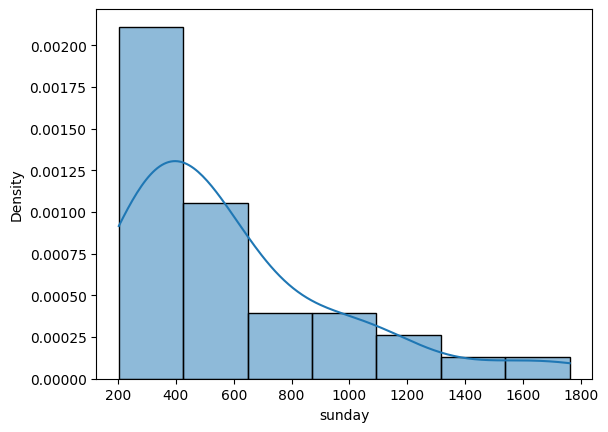

In [58]:
sns.histplot(df['sunday'],kde = True,stat = 'density' )

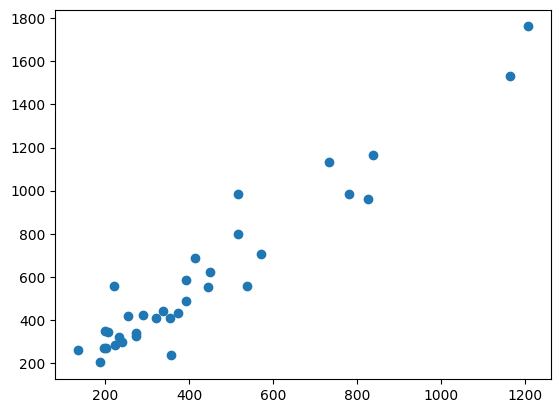

In [59]:
plt.scatter(df['daily'],df['sunday'])

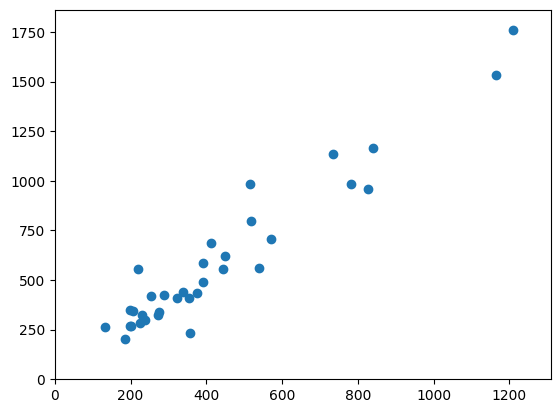

In [60]:
#scatter corelation
x = df['daily']
y = df['sunday']
plt.scatter(df['daily'],df['sunday'])
plt.xlim(0,max(x)+100)
plt.ylim(0,max(y)+100)
plt.show()

In [61]:
df['daily'].corr(df['sunday'])

0.9581543140785462

In [62]:
df[['daily','sunday']].corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


In [63]:
df.corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


In [64]:
model = smf.ols('sunday~daily',data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 sunday   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     358.5
Date:                Wed, 10 Sep 2025   Prob (F-statistic):           6.02e-19
Time:                        12:31:32   Log-Likelihood:                -206.85
No. Observations:                  34   AIC:                             417.7
Df Residuals:                      32   BIC:                             420.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.8356     35.804      0.386      0.702     -59.095      86.766
daily          1.3397      0.071     18.935      0.000       1.196       1.484
==============================================================================
Omnibus:                        3.297   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                1.990
Skew:                           0.396   Prob(JB):                        0.370
Kurtosis:                       3.882   Cond. No.                         965.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

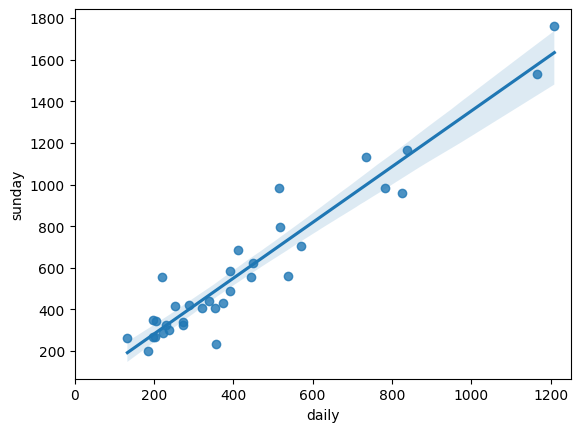

In [65]:
sns.regplot(x='daily',y='sunday',data = df)
plt.xlim([0,1250])
plt.show()

In [66]:
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [67]:
model.tvalues,model.pvalues

(Intercept     0.386427
 daily        18.934840
 dtype: float64,
 Intercept    7.017382e-01
 daily        6.016802e-19
 dtype: float64)

In [68]:
model.rsquared, model.rsquared_adj

(0.9180596895873295, 0.9154990548869336)

### New data prediction

In [69]:
newdata = pd.Series([200,300,1500])
data_pred = pd.DataFrame(newdata,columns = ['daily'])
data_pred

,daily
0,200
1,300
2,1500


In [70]:
model.predict(data_pred)

0     281.778581
1     415.750057
2    2023.407766
dtype: float64

In [71]:
# predict on all given taining data

# y hat values
pred = model.predict(df['daily'])
pred

0      538.939509
1      706.442705
2      490.275710
3      333.431284
4      734.307432
5      996.884826
6      280.213795
7      352.279731
8      290.090172
9      323.546868
10     616.379041
11     400.438457
12     262.668890
13    1573.783417
14     609.447357
15     566.965002
16     378.613164
17    1061.219269
18    1633.852208
19    1119.786239
20     313.594128
21     489.224034
22     704.489401
23     309.195844
24     466.219792
25     277.920203
26     192.337885
27     514.901007
28     380.708478
29     777.960698
30     538.047259
31     284.270451
32     444.722729
33    1137.725020
dtype: float64

In [72]:
df['predicted'] = pred
df

,daily,sunday,predicted
0,391.952,488.506,538.939509
1,516.981,798.298,706.442705
2,355.628,235.084,490.275710
3,238.555,299.451,333.431284
4,537.780,559.093,734.307432
5,733.775,1133.249,996.884826
6,198.832,348.744,280.213795
7,252.624,417.779,352.279731
8,206.204,344.522,290.090172
9,231.177,323.084,323.546868


In [73]:
df['residuals'] = df['sunday'] -  df['predicted'] 
df

,daily,sunday,predicted,residuals
0,391.952,488.506,538.939509,-50.433509
1,516.981,798.298,706.442705,91.855295
2,355.628,235.084,490.275710,-255.191710
3,238.555,299.451,333.431284,-33.980284
4,537.780,559.093,734.307432,-175.214432
5,733.775,1133.249,996.884826,136.364174
6,198.832,348.744,280.213795,68.530205
7,252.624,417.779,352.279731,65.499269
8,206.204,344.522,290.090172,54.431828
9,231.177,323.084,323.546868,-0.462868


### MSE

In [76]:
mse = np.mean((df['sunday'] - df['predicted'])**2)
rmse = np.sqrt(mse)
mse,rmse

(11268.692072241502, 106.1540958806654)

### MAE

In [77]:
mae = np.mean(np.abs(df['sunday'] - df['predicted']))
mae

80.1327444999346

### MAE

In [80]:
mape = np.mean(np.abs((df['daily'] - df['predicted'])/df['daily'])*100)
mape

38.27111928552967

In [ ]:
# scatter plot epsilon vs yhat --homoscedasticity
# q-q plot residual 
# kde hist plot

Text(0, 0.5, 'residuals')

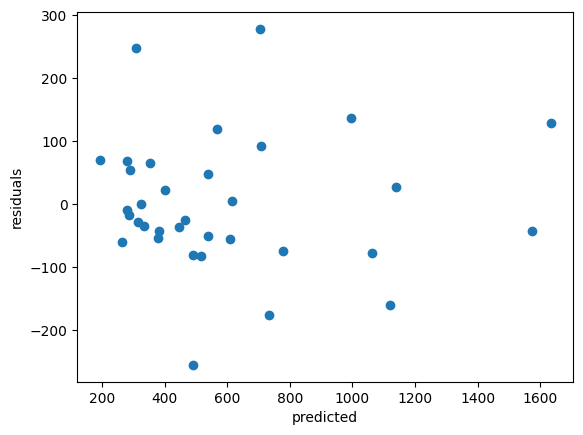

In [82]:
plt.scatter(df['predicted'],df['residuals'])
plt.xlabel('predicted')
plt.ylabel('residuals')

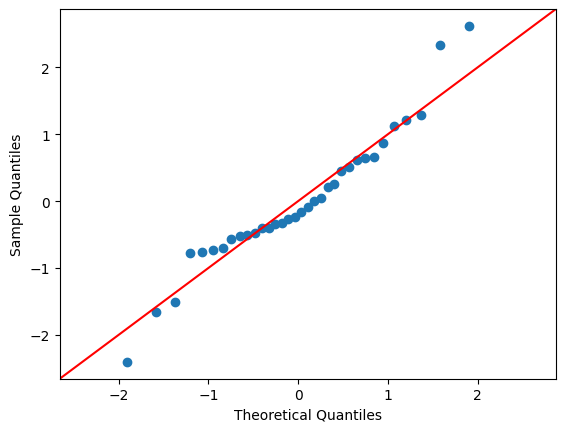

In [86]:
# q-q plot
import statsmodels.api as smf
smf.qqplot(df['residuals'],line = '45',fit = True)
plt.show()

<Axes: xlabel='residuals', ylabel='Count'>

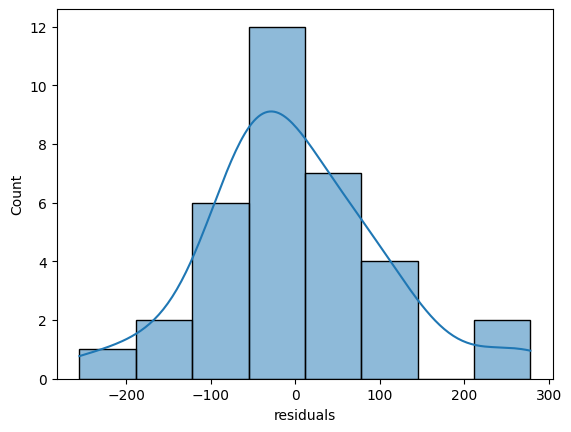

In [88]:
sns.histplot(df['residuals'],kde = True)

In [74]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# MULTIPLE LINEAR REGRESSION

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [24]:
cars = pd.read_csv("Cars.csv")
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [25]:
df = pd.DataFrame(cars,columns=["HP","VOL","SP","WT","MPG"])
df.head()

,HP,VOL,SP,WT,MPG
0,49,89,104.185353,28.762059,53.700681
1,55,92,105.461264,30.466833,50.013401
2,55,92,105.461264,30.193597,50.013401
3,70,92,113.461264,30.632114,45.696322
4,53,92,104.461264,29.889149,50.504232


In [26]:
df.shape

(81, 5)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   VOL     81 non-null     int64  
 2   SP      81 non-null     float64
 3   WT      81 non-null     float64
 4   MPG     81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
HP,81.0,117.469136,57.113502,49.000000,84.000000,100.000000,140.000000,322.000000
VOL,81.0,98.765432,22.301497,50.000000,89.000000,101.000000,113.000000,160.000000
SP,81.0,121.540272,14.181432,99.564907,113.829145,118.208698,126.404312,169.598513
WT,81.0,32.412577,7.492813,15.712859,29.591768,32.734518,37.392524,52.997752
MPG,81.0,34.422076,9.131445,12.101263,27.856252,35.152727,39.531633,53.700681


In [29]:
df.isnull().sum()

HP     0
VOL    0
SP     0
WT     0
MPG    0
dtype: int64

In [30]:
df[df.duplicated()]

,HP,VOL,SP,WT,MPG


<Axes: >

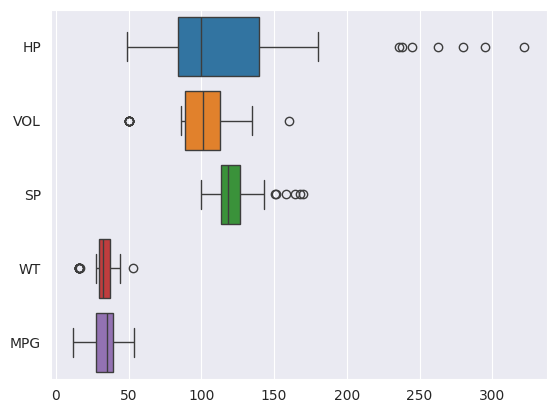

In [31]:
sns.boxplot(df,orient="h")

In [32]:
df.corr(numeric_only=True)

,HP,VOL,SP,WT,MPG
HP,1.000000,0.077459,0.973848,0.076513,-0.725038
VOL,0.077459,1.000000,0.102170,0.999203,-0.529057
SP,0.973848,0.102170,1.000000,0.102439,-0.687125
WT,0.076513,0.999203,0.102439,1.000000,-0.526759
MPG,-0.725038,-0.529057,-0.687125,-0.526759,1.000000


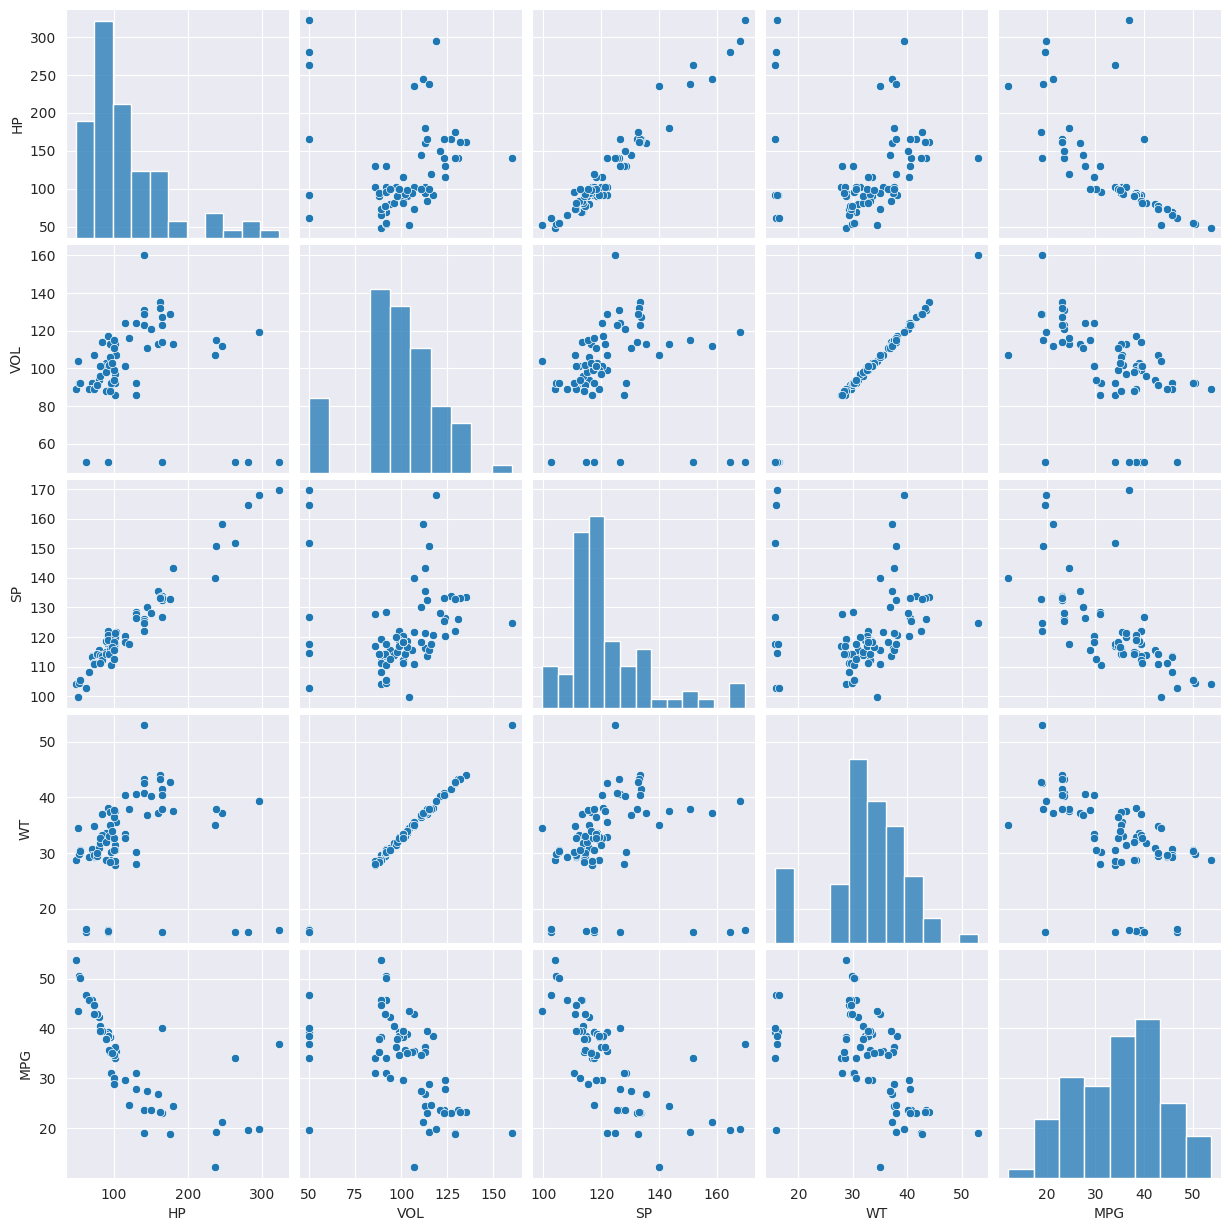

In [33]:
sns.set_style(style="darkgrid")
sns.pairplot(df)

In [34]:
model = smf.ols("MPG~WT+VOL+SP+HP",data=df).fit()

In [35]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Thu, 11 Sep 2025   Prob (F-statistic):           1.54e-23
Time:                        09:28:31   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
SP             0.3956      0.158      2.500      0.015       0.080       0.711
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
model.params

Intercept    30.677336
WT            0.400574
VOL          -0.336051
SP            0.395627
HP           -0.205444
dtype: float64

In [37]:
model.tvalues

Intercept    2.058841
WT           0.236541
VOL         -0.590970
SP           2.499880
HP          -5.238735
dtype: float64

In [38]:
model.pvalues

Intercept    0.042936
WT           0.813649
VOL          0.556294
SP           0.014579
HP           0.000001
dtype: float64

### MULTI-COLLINEARITY CHECK

In [39]:
r_hp = smf.ols("HP~WT+VOL+SP",data=df).fit().rsquared
vif_hp = 1/(1-r_hp)

r_wt = smf.ols("WT~HP+VOL+SP",data=df).fit().rsquared
vif_wt = 1/(1-r_wt)

r_vol = smf.ols("VOL~WT+HP+SP",data=df).fit().rsquared
vif_vol = 1/(1-r_vol)

r_sp = smf.ols("SP~WT+VOL+HP",data=df).fit().rsquared
vif_sp = 1/(1-r_sp)

In [40]:
print(f"{vif_hp},{vif_wt},{vif_vol},{vif_sp}")

19.92658897499852,639.5338175572624,638.8060836592878,20.00763878305008


In [41]:
d1 = {"Variables":["HP","WT","VOL","SP"],"VIF":[vif_hp,vif_wt,vif_vol,vif_sp]}
vif_frame = pd.DataFrame(d1)
vif_frame

,Variables,VIF
0,HP,19.926589
1,WT,639.533818
2,VOL,638.806084
3,SP,20.007639


In [42]:
df.drop("WT",axis=1,inplace=True)
df

,HP,VOL,SP,MPG
0,49,89,104.185353,53.700681
1,55,92,105.461264,50.013401
2,55,92,105.461264,50.013401
3,70,92,113.461264,45.696322
4,53,92,104.461264,50.504232
...,...,...,...,...
76,322,50,169.598513,36.900000
77,238,115,150.576579,19.197888
78,263,50,151.598513,34.000000
79,295,119,167.944460,19.833733


In [43]:
model2 = smf.ols("MPG~HP+VOL+SP",data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     86.11
Date:                Thu, 11 Sep 2025   Prob (F-statistic):           1.56e-24
Time:                        09:28:42   Log-Likelihood:                -233.99
No. Observations:                  81   AIC:                             476.0
Df Residuals:                      77   BIC:                             485.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.9234     14.466      2.069      0.042       1.118      58.729
HP            -0.2067      0.039     -5.353      0.000      -0.284      -0.130
VOL           -0.2017      0.023     -8.928      0.000      -0.247      -0.157
SP             0.4007      0.156      2.571      0.012       0.090       0.711
==============================================================================
Omnibus:                       10.810   Durbin-Watson:                   1.389
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.822
Skew:                           0.704   Prob(JB):                      0.00271
Kurtosis:                       4.233   Cond. No.                     5.87e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
from statsmodels.graphics.regressionplots import influence_plot
model_influence = model2.get_influence()
(c,_) = model_influence.cooks_distance
c

array([4.43781421e-02, 2.31439849e-02, 2.31439849e-02, 5.50743307e-03,
       2.84029117e-02, 3.89961849e-03, 2.31439849e-02, 3.39659293e-03,
       3.39659293e-03, 9.67532550e-04, 3.00465895e-03, 9.32152031e-02,
       2.65177317e-04, 3.00465895e-03, 5.41784561e-03, 3.00465895e-03,
       8.22731925e-04, 9.32152031e-02, 8.22731925e-04, 3.21833541e-04,
       2.70620733e-05, 8.34770054e-03, 1.83348025e-05, 2.72860299e-04,
       1.23307010e-03, 7.41312614e-02, 5.71759163e-03, 2.70620733e-05,
       3.33387970e-02, 9.21393948e-05, 5.93913831e-03, 1.23367282e-03,
       2.67864467e-04, 1.10555542e-03, 1.21312479e-03, 2.01774924e-05,
       4.19374936e-04, 4.18657710e-03, 4.18657710e-03, 1.12077324e-02,
       2.70424384e-04, 3.80042521e-06, 1.99290460e-03, 2.64674273e-03,
       2.22196543e-05, 4.76293133e-04, 2.58868946e-05, 4.92204073e-05,
       1.55796817e-02, 3.53143210e-03, 3.53143210e-03, 3.53143210e-03,
       2.30754944e-05, 1.04055062e-02, 1.07199598e-03, 2.89811901e-04,
      

In [45]:
c.shape

(81,)

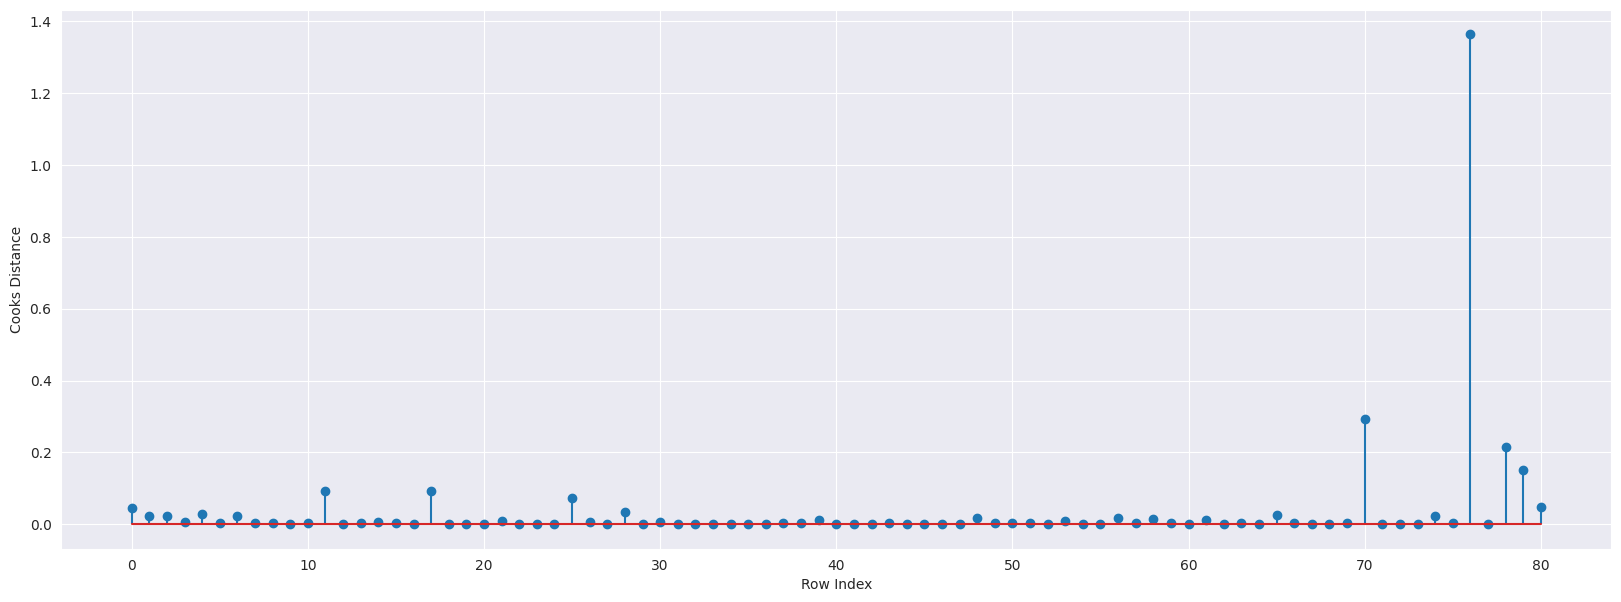

In [46]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df)),np.round(c,3))
plt.xlabel("Row Index")
plt.ylabel("Cooks Distance")
plt.show()

In [47]:
row_outliers = df[df.index.isin([70,76,78,79])]
row_outliers

,HP,VOL,SP,MPG
70,280,50,164.598513,19.678507
76,322,50,169.598513,36.900000
78,263,50,151.598513,34.000000
79,295,119,167.944460,19.833733


In [48]:
cars1 = df.drop(df.index[[70,76,78,79]],axis=0).reset_index()
cars1

,index,HP,VOL,SP,MPG
0,0,49,89,104.185353,53.700681
1,1,55,92,105.461264,50.013401
2,2,55,92,105.461264,50.013401
3,3,70,92,113.461264,45.696322
4,4,53,92,104.461264,50.504232
...,...,...,...,...,...
72,73,140,160,124.715241,19.086341
73,74,140,129,121.864163,19.086341
74,75,175,129,132.864163,18.762837
75,77,238,115,150.576579,19.197888


In [49]:
model3 = smf.ols("MPG~HP+VOL+SP",data=cars1).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     158.6
Date:                Thu, 11 Sep 2025   Prob (F-statistic):           6.81e-32
Time:                        09:30:00   Log-Likelihood:                -200.71
No. Observations:                  77   AIC:                             409.4
Df Residuals:                      73   BIC:                             418.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.2974     11.336      2.232      0.029       2.706      47.889
HP            -0.2635      0.031     -8.634      0.000      -0.324      -0.203
VOL           -0.1362      0.021     -6.366      0.000      -0.179      -0.094
SP             0.4335      0.122      3.560      0.001       0.191       0.676
==============================================================================
Omnibus:                        9.478   Durbin-Watson:                   1.195
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.184
Skew:                           0.770   Prob(JB):                       0.0101
Kurtosis:                       3.703   Cond. No.                     5.72e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""